# DSC4001-01 Exercise 12

**This exercise notebook will go through Supervised Learning using Python's Scikit-Learn Library**


* Machine learning involves building mathematical models to help understand data. "Learning" gives these models *tunable parameters* that can be adapted to observed *data*. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data. Fundamentaly, machine learning can be categorized into **supervised learning**, **unsupervised learning** and **reinforcement learning**. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

## Import Scikit-Learn

In [ ]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

## Get the dataset

* datasets.[load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) 

  * classes: 3 (label: 'species', 0, 1 or 2)
  * total samples: 150 (50 samples per class)
  * dimensionality: 4 ('sepal_length', 'sepal_width', 'petal_length', 'petal_width')
  * features: real, positive


### Load the data

In [ ]:
X_iris, y_iris = datasets.load_iris(return_X_y=True)

In [ ]:
print(X_iris.shape)
print(y_iris.shape)

(150, 4)
(150,)


In [ ]:
print(X_iris[:5])
print(y_iris[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [ ]:
data_iris = pd.DataFrame(np.concatenate((X_iris, y_iris.reshape(150,1)), axis=1), 
  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [ ]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Or, we can directly load the 'iris' dataset in the form of ``DataFrame`` using the seaborn library.

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualize the data

We can use Seaborn or Matplotlib to conveniently visualize the data and get some intuition from the data. 


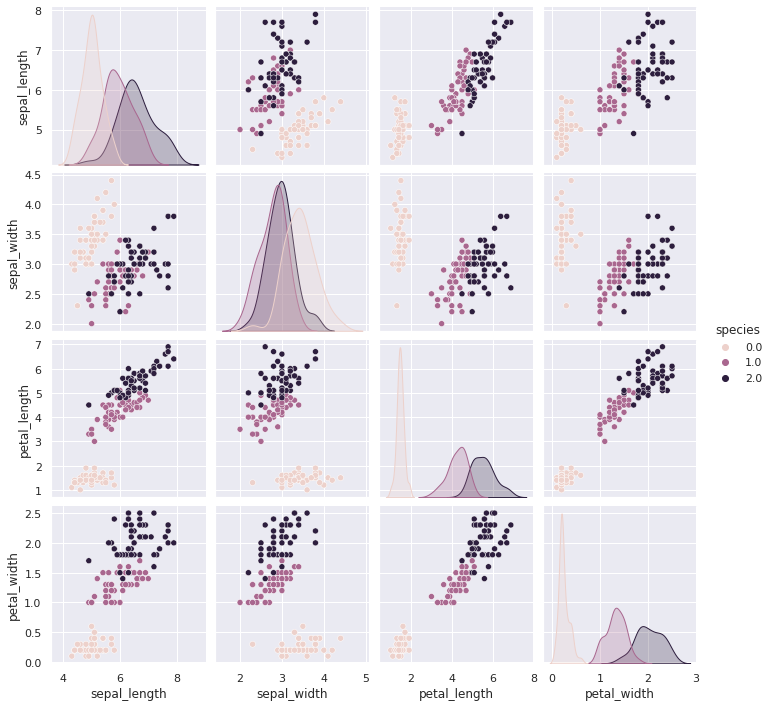

In [ ]:
sns.set()
sns.pairplot(data_iris, hue='species')
plt.show()

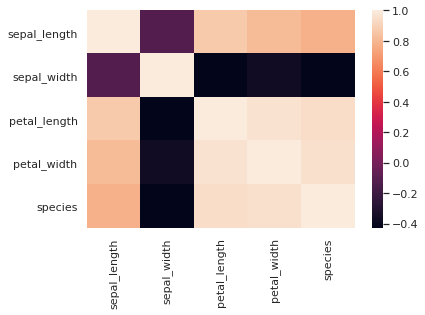

In [ ]:
sns.heatmap(data_iris.corr())
plt.show()

### Train-Test dataset split

We can manually split the entire dataset into train and test, or we can use **``train_test_split()** method instead

* ``sklearn.model_selection.train_test_split()``: Split arrays or matrices into random train and test subsets. 
  * ``test_size``: If float in range $(0.0, 1.0)$, it represents the proportion of the dataset to include in the test split. If in, it represents the absolute number of test samples.
  * ``random_state``: controls the random shuffling applied to the data before applying the split.

In [ ]:
X_train = X_iris[: int(.8 * len(X_iris))]
X_test = X_iris[int(.8 * len(X_iris)):]
y_train = y_iris[: int(.8 * len(X_iris))]
y_test = y_iris[int(.8 * len(X_iris)):]

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(120, 4)
(30, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [ ]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, 
  test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_test)

(120, 4)
(30, 4)
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


## Data Preparation for ML algorithm

Features have different, various forms and characteristics. If necessary, we need to handle followings: 

* missing values
* numerical and/or Text/Categorical features
* different ranges
  

## Train and Predict

* Select a type of classifier model 
  * In sklearn: 
    * [K-nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    * [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
    * [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) 
    * [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
    * [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
    * [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier)
    * ... 

* Instantiate the classifier model 

* Train the classifier model on training data
  * **``.fit(X, y)``**: Fit the SVC model according to the given training data

* Predict on test data
  * **``.predict(X)``**: Perform classification on samples in ``X``

* Evaluate the performance
  * We can evaluate the model with various metrics
  * Typically for supervised learning, use ``sklearn.metrics.accuracy_score()``, ``sklearn.metrics. confusion_matrix()``, ``sklearn.metrics.classification_report()``, ``sklearn.metrics.mean_squared_error()``, ... 
  


### Linear SVC

We will focus on **SVC (Support Vector Classifier)** model for classification task. 

* ``sklearn.svm.SVC``: Support Vector Classification, or for linear SVC, we can use ``sklearn.svm.LinearSVC``.

  * ``C``: Regularization parameter. The strength of the regularization is inversely proportional to $C$. 
  * ``kernel``: {'linear', 'poly', 'rbf', 'sigmoid', ...}.  It specifies the kernel type to be used in the SVC algorithm. 
  * ``gamma``: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels.


In [ ]:
# Instantiate the clssifier model 

svc_clf = SVC(kernel='linear')
svc_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Fitting the model on training data

svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict labels for unknown, new test data

y_pred_test= svc_clf.predict(X_test)

# Predict labels for training data for evaluation
y_pred_train = svc_clf.predict(X_train)

In [ ]:
print(y_test)
print(y_pred_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [ ]:
# Evaluate the prediction results

acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)

In [ ]:
print('SVC-linear: Train accuracy score %f' %(acc_train))
print('SVC-linear: Test accuracy score %f' %(acc_test))

SVC-linear: Train accuracy score 0.975000
SVC-linear: Test accuracy score 1.000000


In [ ]:
# classification report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

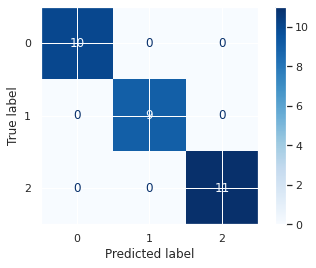

In [ ]:
disp = sklearn.metrics.plot_confusion_matrix(svc_clf, X_test, y_test, cmap=plt.cm.Blues)
disp.confusion_matrix

array([[40,  0,  0],
       [ 0, 39,  2],
       [ 0,  1, 38]])

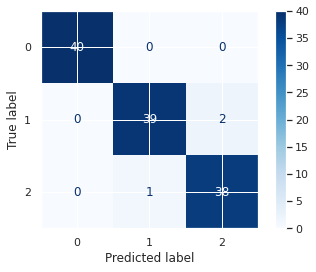

In [ ]:
disp = sklearn.metrics.plot_confusion_matrix(svc_clf, X_train, y_train, cmap=plt.cm.Blues)
disp.confusion_matrix

### RBF SVC

Use a non-linear kernel 'RBF'. 

In [ ]:
# Instantiate the clssifier model 

svc_rbf_clf = SVC(kernel='rbf', gamma=1.0)
svc_rbf_clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Fitting the model on training data

svc_rbf_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predict labels for training and test data

y_pred_train = svc_rbf_clf.predict(X_train)
y_pred_test= svc_rbf_clf.predict(X_test)

In [ ]:
# Evaluate the prediction results

acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)

print('SVC-rbf: Train accuracy score %f' %(acc_train))
print('SVC-rbf: Test accuracy score %f' %(acc_test))

SVC-rbf: Train accuracy score 0.991667
SVC-rbf: Test accuracy score 1.000000


### Decision Tree and Random Forest Classifier

* ``sklearn.tree.DecisionTreeClassifier``: the value of ``max_depth`` controls the size of the tree.

In [ ]:
# Instantiate the classifier model 

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Fitting the model on training data

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Predict labels for training and test data

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

In [ ]:
# Evaluate the prediction results

acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)

print('Tree: Train accuracy score %f' %(acc_train))
print('Tree: Test accuracy score %f' %(acc_test))

Tree: Train accuracy score 0.958333
Tree: Test accuracy score 1.000000


## Simple example of linear regression

Let's consider a simple linear regression - that is, the common case of fitting a line to $(x,y)$ data. 

In [ ]:
# Let's create some data

x = 10 * np.random.rand(50)
y = 2*x - 1 + np.random.randn(50)

In [ ]:
print(x.shape)
print(y.shape)

(50,)
(50,)


In [ ]:
x = x.reshape(len(x),1)
print(x.shape)

(50, 1)


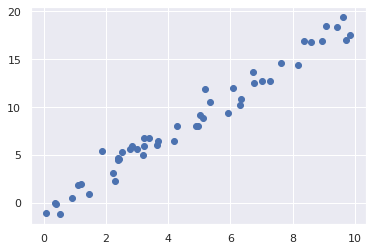

In [ ]:
fig = plt.figure()
plt.scatter(x,y)
plt.show()

Among many regression models provided by Scikit-Learn, we can use ``LinearRegression`` class for this simple example data. 

* ``sklearn.linear_model.LinearRegression``: It fits a linear model with coefficients (기울기, 절편) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

  * ``fit_intercept``: whether to calculate the intercept for this model 

In [ ]:
# Instantiate the regressor model

lin_reg = LinearRegression(fit_intercept=True)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Fitting the model on data

lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[1.96685296]
-0.653131896251292


In [ ]:
# Predict labels for unknown data

x_test = np.linspace(-1, 11)
x_test = x_test.reshape(len(x_test),1)

In [ ]:
y_pred_test = lin_reg.predict(x_test)

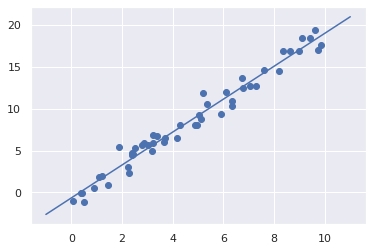

In [ ]:
plt.scatter(x,y)
plt.plot(x_test, y_pred_test)
plt.show()

## Quiz: Linear Regression with Diabetes dataset

* Load dataset ``X_diabetes, y_diabetes`` using ``sklearn.datasets.load_diabetes()``.

In [ ]:
# Load the diabetes dataset using datasets.load_diabetes()

X_diabetes, y_diabetes = ___

In [ ]:
print(X_diabetes.shape)
print(y_diabetes.shape)

(442, 10)
(442,)


* Let's use only the 3rd feature among 10 features.

In [ ]:
# Use only the 3rd feature value as input

X_diabetes = X_diabetes[:,2].reshape(X_diabetes.shape[0],1)
print(X_diabetes.shape)

(442, 1)


* Split the data into training ``X_train, y_train`` and test ``X_test, y_test`` sets: 90% for training and 10% for test, using ``sklearn.model_selection.train_test_split()``.

In [ ]:
# Split the data X_diabetes, y_diabetes into training set X_train, y_train and test set X_test, y_test



In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(397, 1)
(397,)
(45, 1)
(45,)


* Use linear regression model called ``lin_reg`` using ``sklearn.linear_model.LinearRegression()``.


In [ ]:
# Instantiate the model called lin_reg



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Train the model using training data

In [ ]:
# Fit the model on training dataset



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Make predictions called ``y_pred_test`` for test set ``X_test``.

In [ ]:
# Predict values y_pred_test for test data X_test 



* Evaluate the predictions in terms of mean squared error (using ``sklearn.metrics.mean_squared_error()``).

In [ ]:
# Evaluate mean squared error of predictions: using mean_squared_error function.

mse_test = 

In [ ]:
print('Linear regression: Mean squared error: %f' %(mse_test))

Linear regression: Mean squared error: 4066.561954


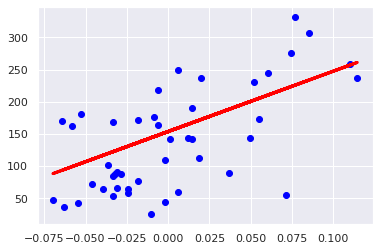

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred_test, color='red', linewidth=3)

plt.show()